# TTK4225 Assignment 3

### Note

Some of the points below may be either solved by pen and paper, or by coding.

The most important thing in this assignment is to understand the logics behind each procedural step you take. Thus for the teachers it does not matter which way you choose, the important is that you understand what you do.

### Question 1

An "averaging filter" (see for more details https://en.wikipedia.org/wiki/Moving_average) is a system that de-noises a signal by averaging out its values, i.e., compute a weighted running mean. From Wikipedia, and changing a bit the notation so to be in line with that of this course,

"An example of a simple equally weighted running mean is the mean over the last $K+1$ entries of a data-set containing $N$ entries. Let those datapoints be the discrete time signal $u_1, u_2, \ldots, u_N$, and denote with $u_n$ the generic value of the signal $u$ at the discrete time $n$ (as an example, this could be closing prices of a stock $u$ at day $n$). The mean over the last $K$ datapoints (days in this example) may be denoted as $y_n$ and calculated as:
$$
y_n =\frac{u_{n} + u_{n-1} + \ldots + u_{n-K}}{K} = \frac{1}{K+1} \sum_{\tau = 0}^{K} u_{n - \tau}.
$$

Here thus the system is discrete time. Explain in the markup cell below and with a few words how this operation resembles a convolution in discrete time, and how it connects to what we saw in class, i.e., "convolution in continuous time". (Hint: here there is something that looks like a rectangle - what?)

If you wish you may also write down things by pen and paper and upload a picture of the solution.

TODO write your solution to Question 1 here

### Question 2

The code below mimics a situation where a signal is noisy, and filtering is used to reconstruct the clean signal. In the following, 'different lengths of the moving average filter' means changing the value of ```filter_length```.

Try different values (e.g., 5, 10, 50) and observe how the filtered signal changes. Your objective is to compare how well the moving average filter reconstructs the clean signal from the noisy signal for different filter lengths, and get a feeling of the trade-off between smoothing (longer filter) and retaining the original signal’s details (shorter filter).

Write in the markup cell below the code cell below what you understood and which length of the window you would actually choose (note that later on in the course we will touch on how to do this in a methodological way).

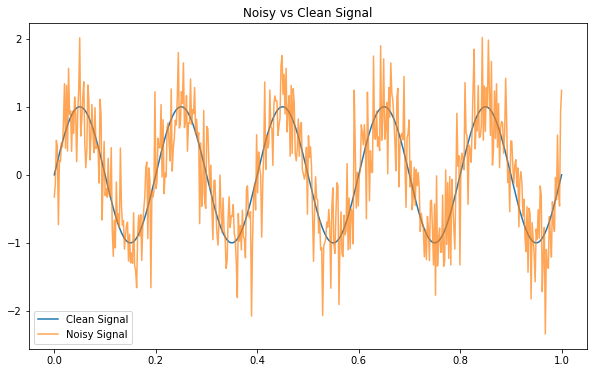

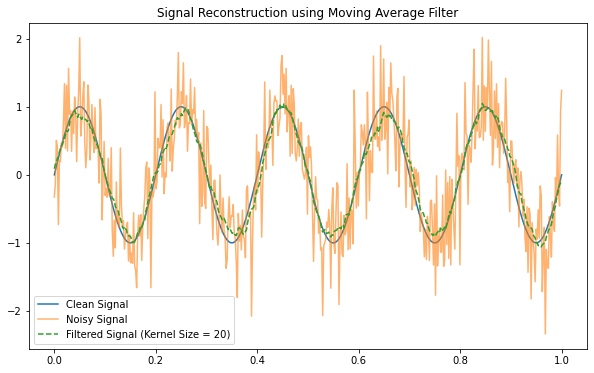

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Create a simple sine wave signal
t = np.linspace(0, 1, 500)
clean_signal = np.sin(2 * np.pi * 5 * t)

# Add noise to the signal
noise = np.random.normal(0, 0.5, len(t))  # Noise with standard deviation 0.5
noisy_signal = clean_signal + noise

# Plot the noisy and clean signal for comparison
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Signal')
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.legend()
plt.title('Noisy vs Clean Signal')
plt.show()

# Interactive part: try different lengths of the moving average filter
filter_length = 20  # Example: students can try 5, 10, 50, etc.
kernel = np.ones(filter_length) / filter_length

# Convolve the noisy signal with the moving average filter
filtered_signal = convolve(noisy_signal, kernel, mode='same')

# Plot the noisy, clean, and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Signal')
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.6)
plt.plot(t, filtered_signal, label=f'Filtered Signal (Kernel Size = {filter_length})', linestyle='dashed')
plt.legend()
plt.title('Signal Reconstruction using Moving Average Filter')
plt.show()

TODO write your solution to question 2 here

### Question 3

Here we experiment how one may filter using actually not just a moving average, but rather a discrete time dynamical system of the form
$$
    y(k)
    =
    \sum_{\tau} a_{\tau} y(k - \tau)
    +
    \sum_{\kappa} b_{\kappa} u(k - \kappa)
$$
by opportunely defining a vector of coefficients $a = [a(1), a(2), \ldots, a(N_a)]$ and $a = [b(1), b(2), \ldots, b(N_b)]$.

For example, the actual filter
$$
    y(k)
    =
    0.5 y(k - 1) + 0.2 y(k-2)
    +
    0.1 u(k - 1) - 0.3 u(k - 2) + 0.9 u(k - 4)
$$
is defined by the vectors
$$
    a = [0.5, 0.2]
    \qquad
    b = [0.1, -0.3, 0, 0.9]
    .
$$

It will become more clear later in the course; at the same time for now think at a discrete time system defined above as an opportune discretization of a continuous time system of the type
$$
    \ddot{y}(t)
    =
    \alpha_1 \dot{y}(t) + \alpha_0 y(t)
    +
    \beta_3 \dddot{u}(t) + \beta_2 \ddot{u}(t) + \beta_1 \dot{u}(t) + \beta_0 u(t)
$$
(and we will also find how the vectors $a$ and $b$ can be computed directly from the vectors $\alpha$ and $\beta$. But for now no need to go into these details).

Playing opportunely with the lenghts of the vectors $a$ and $b$ one may create all sort of filters - and each of them will have their own discrete time impulse response.

Each impulse response will then be usable as a filter to de-noise the signals.

Play a bit with the code below, and:

1) understand if you may encounter some problems if you randomly modify the vector $a$. Describe thus in the markup cell below the code cell below which problems you may get, and why they are problems (try to relate them to how the impulse response looks like).

2) fixing $a$ as $[0.5, 0.2]$, experiment again with changing the length and values of the vector $b$, and find whether you get similar implications than the ones you got while answering question 2. Describe what you understood in the same markup cell as for task 1 above.

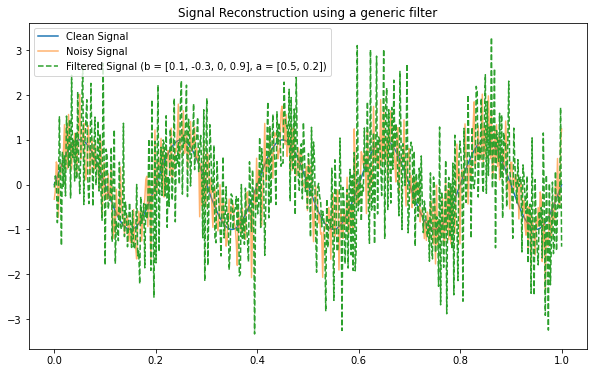

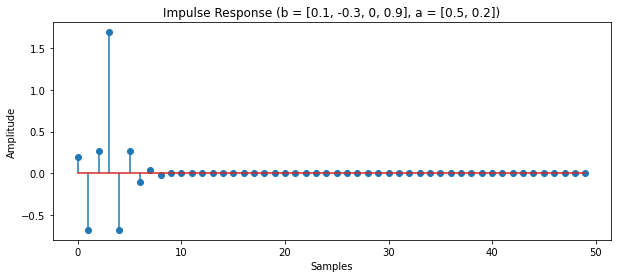

In [4]:
from scipy.signal import lfilter

# Re-define your signal, if you want. If not, comment this
# noisy_signal = TODO

# Define system coefficients
b = [0.1, -0.3, 0, 0.9]
a = [0.5, 0.2]  # Denominator

# Get the impulse response
filtered_signal = lfilter(b, a, noisy_signal)

# Plot the noisy, clean, and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Signal')
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.6)
plt.plot(t, filtered_signal, label=f'Filtered Signal (b = {b}, a = {a})', linestyle='dashed')
plt.legend()
plt.title('Signal Reconstruction using a generic filter')
plt.show()

# Generate an impulse signal
impulse = np.zeros(50)
impulse[0] = 1  # Impulse at t=0

# Get the impulse response of the filter
impulse_response = lfilter(b, a, impulse)

# Plot the impulse response
plt.figure(figsize=(10, 4))
plt.stem(impulse_response)
plt.title(f'Impulse Response (b = {b}, a = {a})')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

TODO add your solution to Question 3 here.

### Question 4 (optional)

This is for who wants to get a glimpse of computer vision -- and for this I especially recommend the video https://youtu.be/KuXjwB4LzSA?si=wlzoqJo3ajlIjvbg (and https://youtu.be/IaSGqQa5O-M?si=CdWfB6AlPoTRJ2Nw too, when you have time).

Play with the ```edge_kernel``` variable (size and values) to get a glimpse of how different kernels may lead to different detection performance. The fastest strategy to do so is to ask some LLM to extend the code below with a set of kernels that you may use in parallel or interchangeably.

No need for reporting anything here -- just play until you got a feeling!

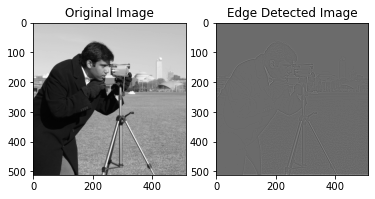

In [10]:
from scipy.signal import convolve2d
from skimage import data

# Load an image
image = data.camera()

# Define a simple edge-detection kernel
edge_kernel = np.array([[-1, -1, -1], 
                        [-1,  8, -1], 
                        [-1, -1, -1]])

# Apply 2D convolution
convolved_image = convolve2d(image, edge_kernel, mode='same')

# Plot original and convolved image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Edge Detected Image')
plt.show()